Projet destinant à simuler un processus stochastique à mouvement discret (jump) - Cf Poison Jumps Process

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Paramètres 

S0 = 70 # Prix initial de l'action
mu = 0.09 # Drift
sigma = 0.20 # Volatilité
alpha = 0.1 # Intensité du saut (nombre moyen de jump/par an)
mu_a = -0.1 # Moyenne (Jump Size)
sigma_a = 0.1 # Ecart-type Jump Size
T = 1 # Période (1 ans) 
dt = 1/252 # Time step (1 trading day) 
N = int(T/dt) # Nombre de steps

In [32]:
# Simulation
np.random.seed(80)

# Initialisation 
prices = np.zeros(N)
prices[0] = S0

# Path simulation

for t in range(1, N):
    Z = np.random.normal(0,1)
    J = np.random.normal(mu_a, sigma_a) if np.random.poisson(alpha * dt) > 0 else 0 

    prices[t] = prices[t-1]* np.exp((mu - 0.5 * sigma**2)*dt + sigma * np.sqrt(dt) * Z + J)

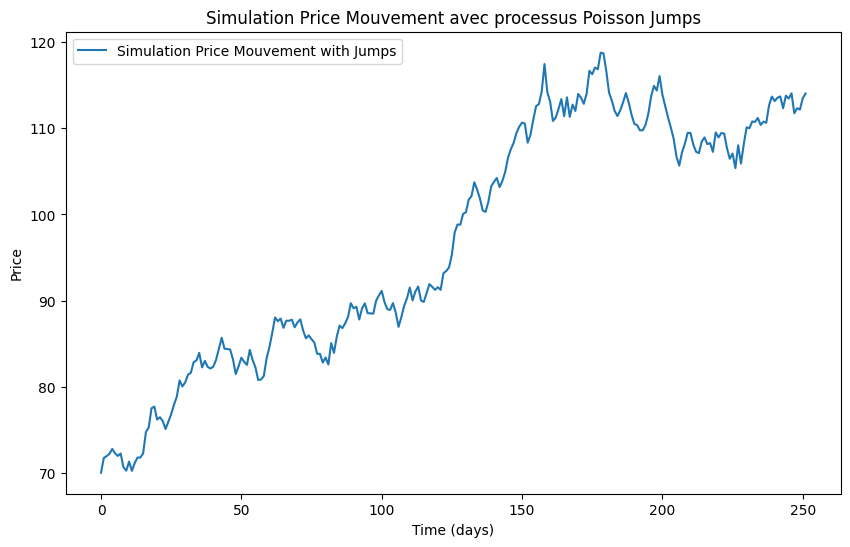

In [33]:
# Ploting des résultats de la simulation
plt.figure(figsize=(10, 6))
plt.plot(prices, label ='Simulation Price Mouvement with Jumps')
plt.xlabel('Time (days)')
plt.ylabel('Price')
plt.title('Simulation Price Mouvement avec processus Poisson Jumps')
plt.legend()
plt.show()